# Optimizer Test

## 1. data 업로드

In [ ]:
!pip install tensorflow

import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x,y), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 2. data 전처리

In [ ]:
from tensorflow.keras.utils import to_categorical

x = x.astype('float32')
x_test = x_test.astype('float32')

x = x.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)

x = x/255.
x_test = x/ 255.

y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 1/6, random_state=3, shuffle = True, stratify=y)

## 3. optimizer list 만들기

In [ ]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=03eb7f5945199c52e9f643b77afb7c5242a36843ab071b23d8ba0f3489292855
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [ ]:
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from keras_radam.training import RAdamOptimizer

Using TensorFlow backend.


In [ ]:
sgd = SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
momentum = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
nag = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
adagrad = Adagrad(learning_rate=0.001)
rmsprop = RMSprop(learning_rate=0.001, rho=0.9)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
radam = RAdamOptimizer(learning_rate=0.001,beta1=0.9,beta2=0.999)

In [ ]:
optimizer_dict = {sgd:'sgd', momentum:'momentum', nag:'nag', adagrad:'adagrad', rmsprop:'rmsprop', adam:'adam', radam:'radam'}

## 4. 모델 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def create_model(optimizer_option):
    model = Sequential()
    model.add(Dense(64, input_shape=(784,), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer = optimizer_option , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

## 5. train

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

!!!!!!!!!!
sgd
!!!!!!!!!!
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 11us/sample - loss: 2.2850 - acc: 0.1494 - val_loss: 2.2673 - val_acc: 0.1819
Epoch 2/20
50000/50000 [==============================] - 0s 8us/sample - loss: 2.2511 - acc: 0.2159 - val_loss: 2.2344 - val_acc: 0.2567
Epoch 3/20
50000/50000 [==============================] - 0s 8us/sample - loss: 2.2197 - acc: 0.2940 - val_loss: 2.2026 - val_acc: 0.3475
Epoch 4/20
50000/50000 [==============================] - 0s 7us/sample - loss: 2.1880 - acc: 0.3876 - val_loss: 2.1695 - val_acc: 0.4336
Epoch 5/20
50000/50000 [==============================] - 0s 7us/sample - loss: 2.1545 - acc: 0.4548 - val_loss: 2.1342 - val_acc: 0.4908
Epoch 6/20
50000/50000 [==============================] - 0s 8us/sample - loss: 2.1184 - acc: 0.4983 - val_loss: 2.0961 - val_acc: 0.5196
Epoch 7/20
50000/50000 [==============================] - 0s 8us/sample - loss: 2.0790 - acc: 0

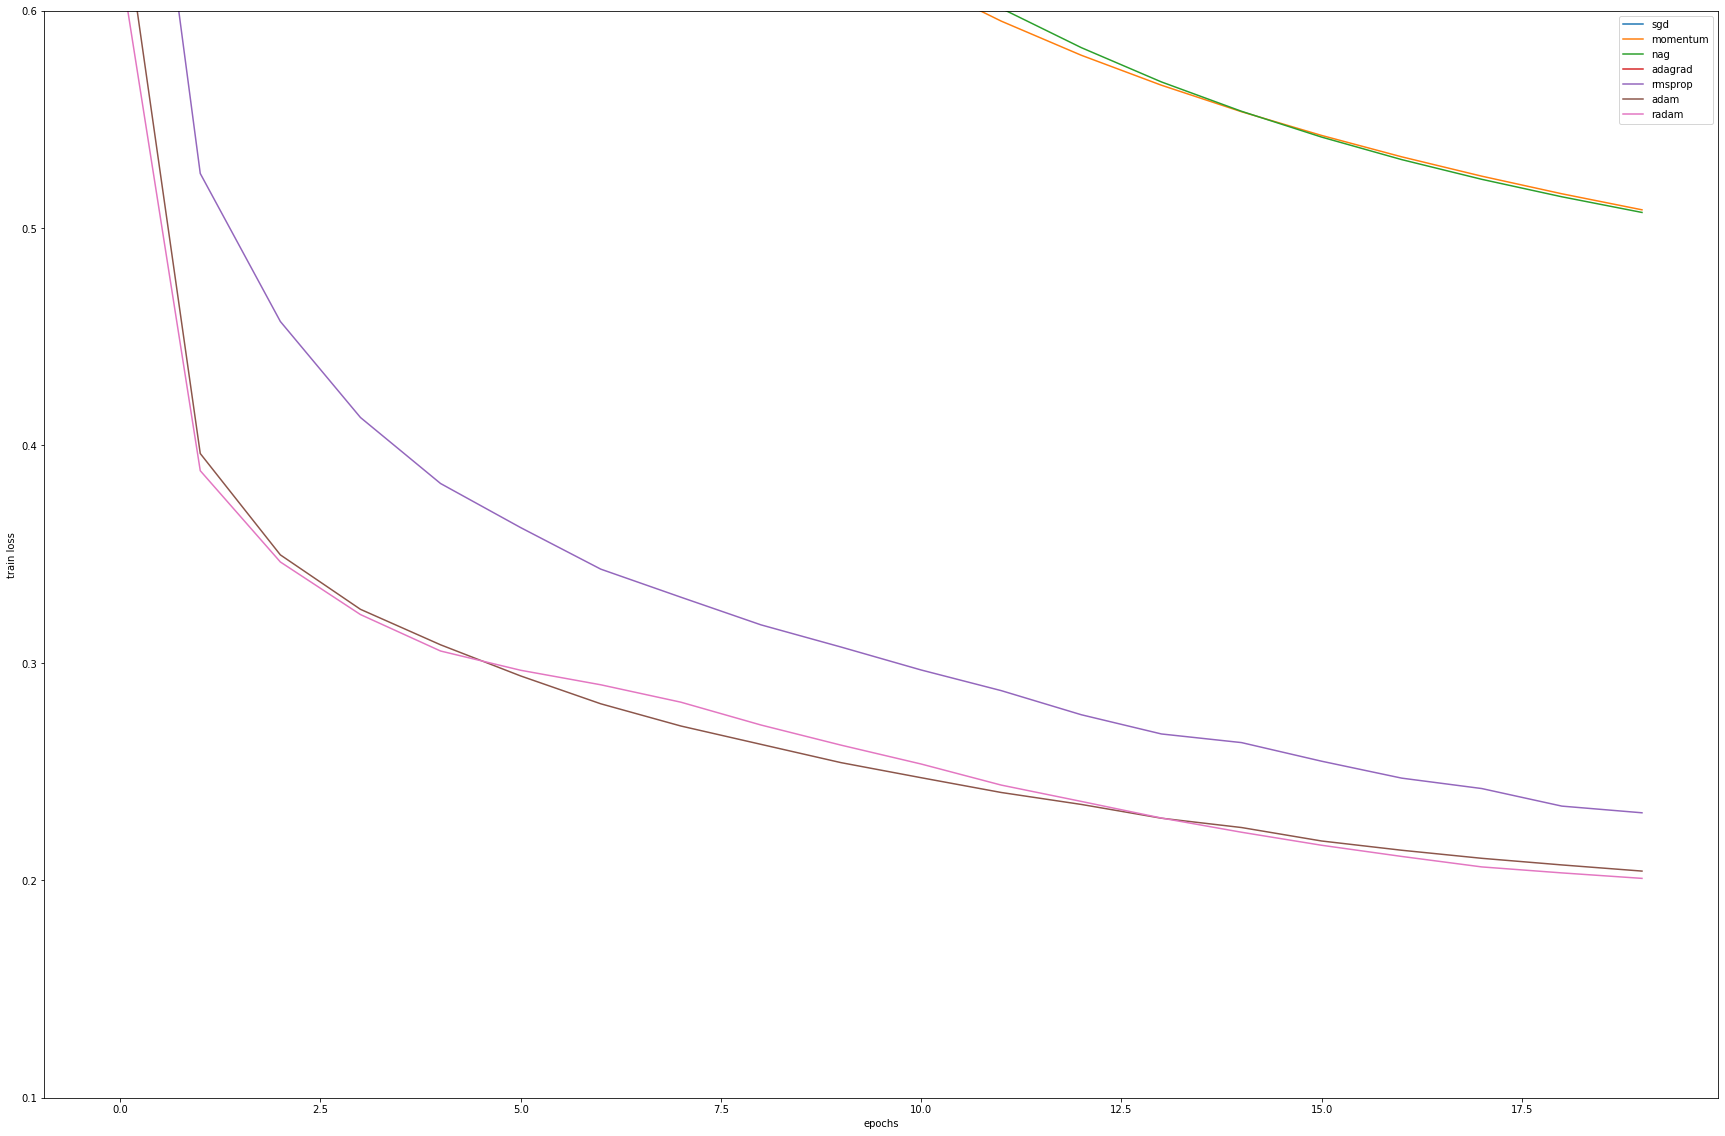

In [ ]:
plt.figure(figsize = (30, 20))
for optimizer in optimizer_dict:
    model = create_model(optimizer)
    print('!'*10)
    print(optimizer_dict[optimizer])
    print('!'*10)
    history = model.fit(x, y, epochs=20, batch_size = 512, validation_split=1/6, verbose=1, shuffle=False)
    df = pd.DataFrame(history.history)
    plt.plot(history.epoch, df['loss'], label = optimizer_dict[optimizer])
    
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.ylim([0.1,0.6])
plt.legend()
plt.show()